The Voice Of The Customer Analysis - Sweaty Betty.

Identyfying key insights from customer reviews.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

voc = pd.read_csv('voice_of_customers.csv')

voc.shape

(592, 6)

Pre-processing data and dropping rows from the table that do not have any value for their customer_feedback field.

In [2]:
# Blank or NaN comments:
voc.columns = voc.columns.str.strip() #removed trailing spaces for column name

if voc['customer_feedback'].str.strip().eq('').any() or voc['customer_feedback'].isna().any():
    result_message = "There are blank or NaN rows in the 'customer_feedback' column."
else:
    result_message = "There are no blank or NaN rows in the 'customer_feedback' column."

print(result_message)

# Remove rows with blank comments
voc_cleaned = voc[~voc['customer_feedback'].str.strip().eq('') & voc['customer_feedback'].notna()]

There are no blank or NaN rows in the 'customer_feedback' column.


In [3]:
# Drop the empty rows
voc.dropna(subset=['customer_feedback'], inplace=True)

voc.shape

(592, 6)

In [4]:
# Identify duplicate rows
duplicate_rows = voc[voc.duplicated()]

print(duplicate_rows)

                                     customer_feedback  Unnamed: 1  \
4    I had a hole in my leggings and contacted cust...         NaN   
5    I placed an order over a week ago. The money p...         NaN   
6    I received an empty package ; next order didn’...         NaN   
7    Unfortunately the quality is not as good as it...         NaN   
13   Found the sizing completely out and leggings s...         NaN   
..                                                 ...         ...   
585  Your sizes are something so different I can ge...         NaN   
586  Your sizing can be a little hit and miss. I’m ...         NaN   
587  Your staff, customer service and products are ...         NaN   
590                                               Cost         NaN   
591                                              Price         NaN   

     Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  
4           NaN         NaN         NaN         NaN  
5           NaN         NaN         NaN         NaN

In [5]:
# Summarize duplicated rows in the dataset
duplicate_summary = voc[voc.duplicated(keep=False)] \
    .groupby(list(voc.columns)) \
    .size() \
    .reset_index(name='Occurrences') \
    .sort_values(by='Occurrences', ascending=False)

print(duplicate_summary)

Empty DataFrame
Columns: [customer_feedback, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Occurrences]
Index: []


In [6]:
# Drop all columns with names containing "Unnamed"
voc_cleaned = voc.loc[:, ~voc.columns.str.contains('^Unnamed')]

print(voc_cleaned.shape)

(592, 1)


In [7]:
voc_cleaned['customer_feedback'].isna().sum()

0

There are no duplicaded rown in the dataset.

In [8]:
# Change all the words in the comments to lower case:

voc_cleaned['customer_feedback'] = voc_cleaned['customer_feedback'].apply(lambda x: " ".join(x.lower() for x in x.split()))

voc_cleaned['customer_feedback'].head()

0    i had a hole in my leggings and contacted cust...
1    i placed an order over a week ago. the money p...
2    i received an empty package ; next order didn’...
3    unfortunately the quality is not as good as it...
4    i had a hole in my leggings and contacted cust...
Name: customer_feedback, dtype: object

In [9]:
# Removing punctuation

voc_cleaned['customer_feedback'] = voc_cleaned['customer_feedback'].str.replace('[^\w\s]','')

voc_cleaned['customer_feedback'].head()

0    i had a hole in my leggings and contacted cust...
1    i placed an order over a week ago the money pa...
2    i received an empty package  next order didnt ...
3    unfortunately the quality is not as good as it...
4    i had a hole in my leggings and contacted cust...
Name: customer_feedback, dtype: object

In [10]:
# Check the number of duplicate values in the customer_feedback column.
voc_cleaned.customer_feedback.duplicated().sum()

296

I decided to remove duplicated entries as they may lead to inacurate analysis and misinterpretation of trends.

In [11]:
# Drop duplicates.
cleaned = voc_cleaned.drop_duplicates(subset=['customer_feedback'])

cleaned.reset_index(inplace=True)
cleaned.head()

,index,customer_feedback
0,0,i had a hole in my leggings and contacted cust...
1,1,i placed an order over a week ago the money pa...
2,2,i received an empty package next order didnt ...
3,3,unfortunately the quality is not as good as it...
4,8,found the sizing completely out and leggings s...


In [12]:
# Reset the index
cleaned = voc_cleaned.reset_index(drop=True)

print(voc_cleaned.head())

                                   customer_feedback
0  i had a hole in my leggings and contacted cust...
1  i placed an order over a week ago the money pa...
2  i received an empty package  next order didnt ...
3  unfortunately the quality is not as good as it...
4  i had a hole in my leggings and contacted cust...


Word Cloud - checking most frequently used words in feedback.

In [13]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_feedback = ''
for i in range(cleaned.shape[0]):
    # Add each comment.
    all_feedback = all_feedback + cleaned['customer_feedback'][i]

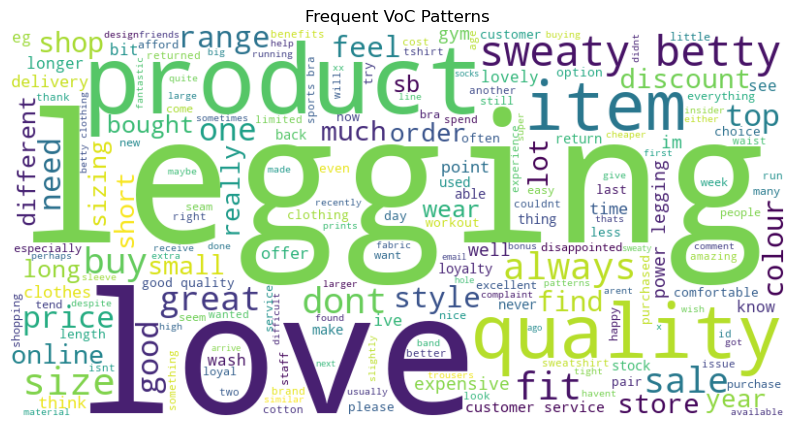

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent VoC Patterns')
plt.show()

Find the most frequently used words with tokenisation    

In [15]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenise the words.
cleaned['tokens'] = cleaned['customer_feedback'].apply(word_tokenize)

cleaned['tokens'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alicja.walaszek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [i, had, a, hole, in, my, leggings, and, conta...
1    [i, placed, an, order, over, a, week, ago, the...
2    [i, received, an, empty, package, next, order,...
3    [unfortunately, the, quality, is, not, as, goo...
4    [i, had, a, hole, in, my, leggings, and, conta...
Name: tokens, dtype: object

In [16]:
# Define an empty list of tokens.
all_tokens = []

for i in range(voc_cleaned.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + cleaned['tokens'][i]

In [17]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

fdist

FreqDist({'the': 552, 'i': 484, 'and': 336, 'to': 328, 'a': 294, 'of': 226, 'in': 200, 'for': 168, 'are': 156, 'leggings': 138, ...})

In [18]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks).
tokens = [word for word in all_tokens if word.isalnum()]

In [19]:
# Eliminating stopwords:

nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alicja.walaszek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


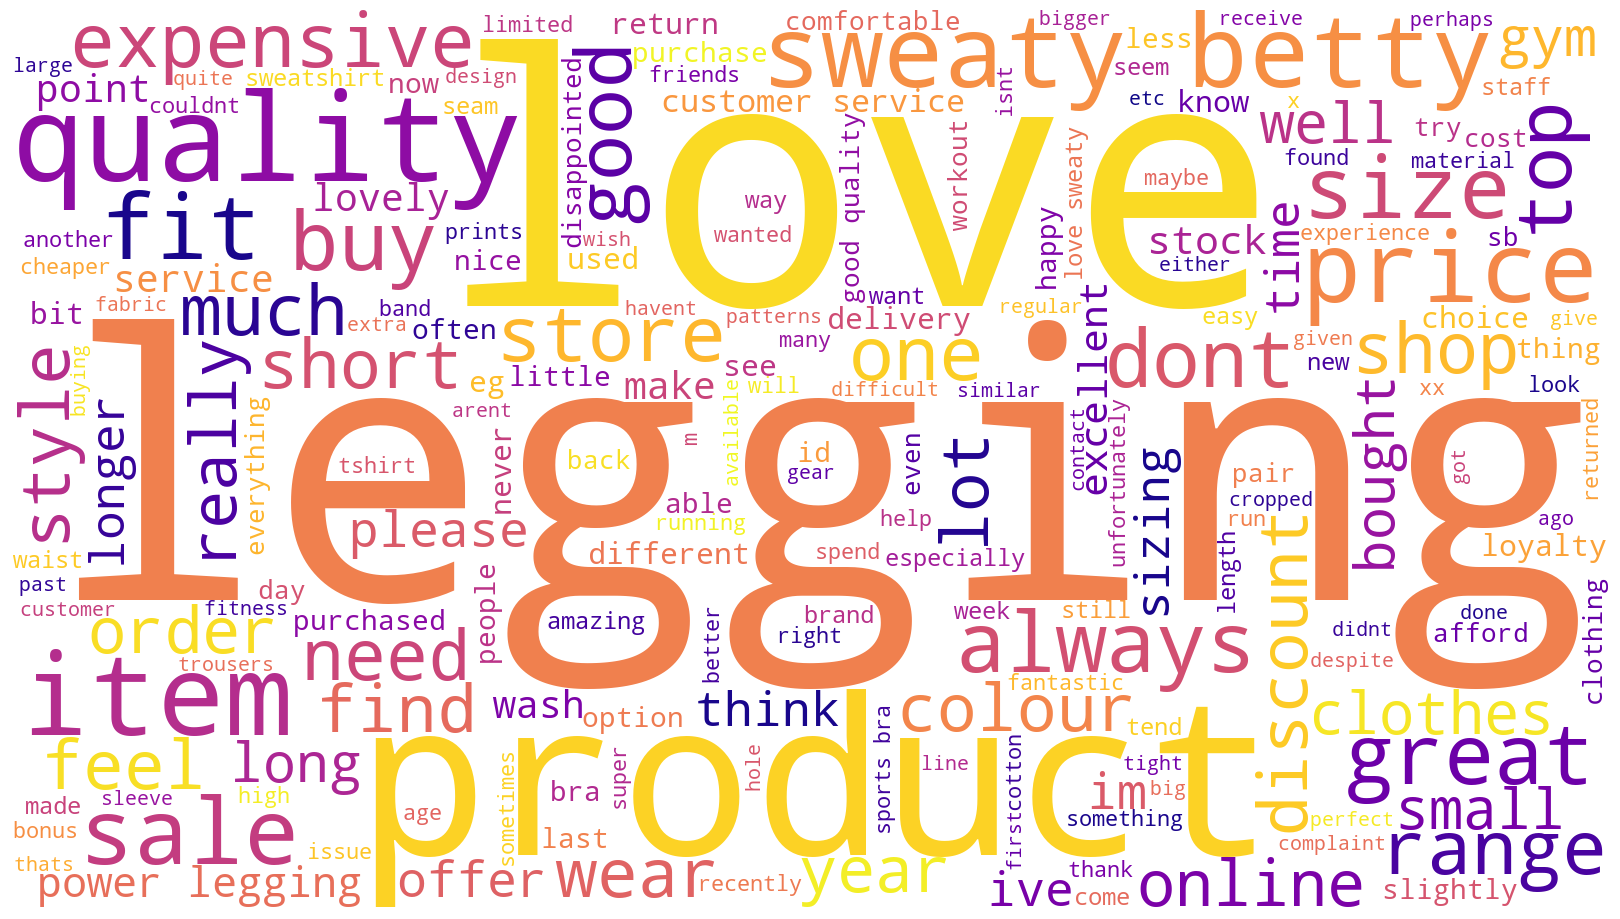

In [20]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 
                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

Count the top 15 words that appear most often.

In [21]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

fdist1

FreqDist({'leggings': 138, 'love': 130, 'quality': 100, 'products': 96, 'would': 86, 'betty': 78, 'sweaty': 76, 'like': 70, 'items': 62, 'price': 60, ...})

In [22]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

counts

,Frequency
Word,
leggings,138
love,130
quality,100
products,96
would,86
betty,78
sweaty,76
like,70
items,62


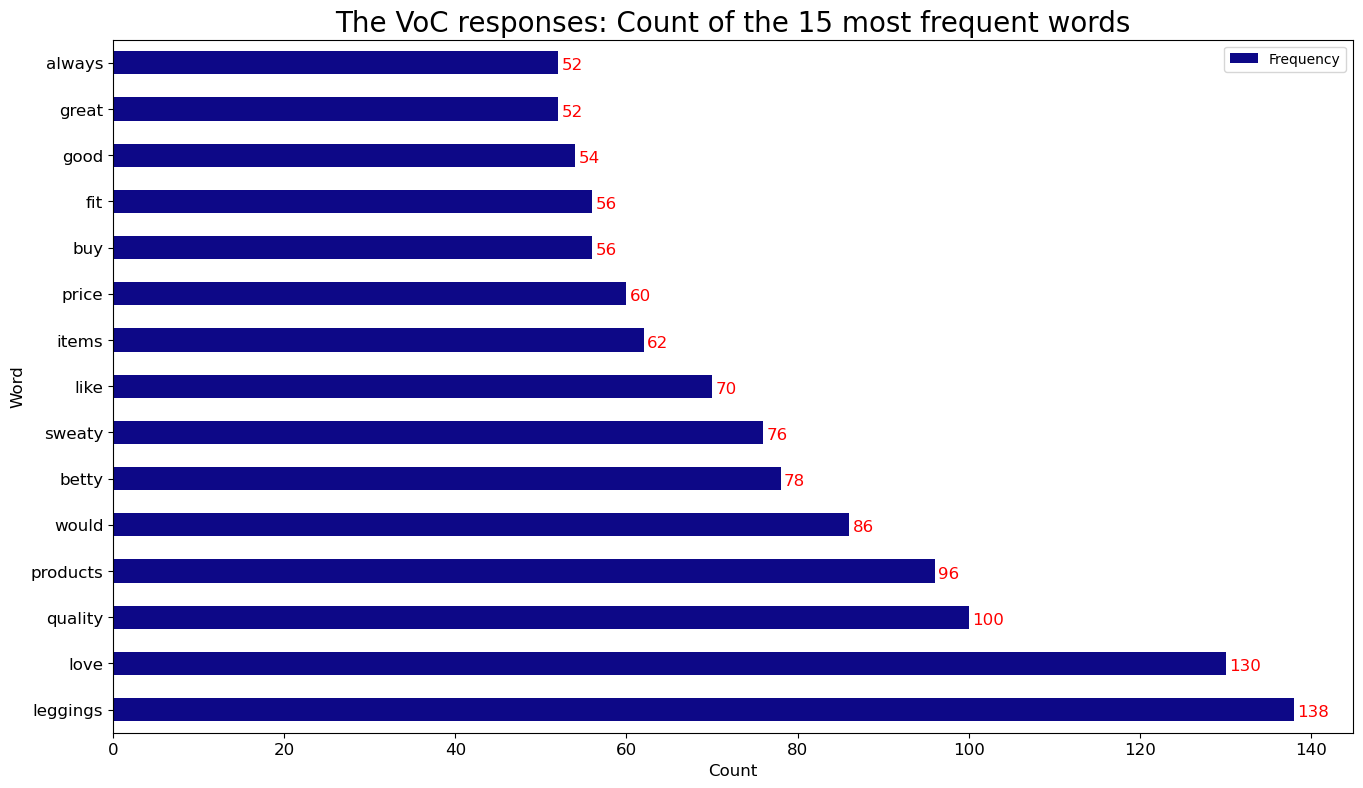

In [23]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("The VoC responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

Extract polarity and subjectivity from survey comments - calculating polarity score.

In [24]:
# Sentiment polarity score

from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
cleaned['polarity'] = cleaned['customer_feedback'].apply(generate_polarity)

cleaned['polarity'].head()

0    0.00
1    0.05
2   -0.35
3    0.20
4    0.00
Name: polarity, dtype: float64

In [25]:
# Subjectivity score:

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
cleaned['subjectivity'] = cleaned['customer_feedback'].apply(generate_subjectivity)

cleaned['subjectivity'].head()

0    0.000
1    0.800
2    0.425
3    0.500
4    0.000
Name: subjectivity, dtype: float64

In [26]:
# Check and add a feedback length column
cleaned['feedback_length'] = cleaned['customer_feedback'].str.len()


print(cleaned[['customer_feedback', 'feedback_length']].head())
print(cleaned['feedback_length'].describe())

                                   customer_feedback  feedback_length
0  i had a hole in my leggings and contacted cust...               85
1  i placed an order over a week ago the money pa...              247
2  i received an empty package  next order didnt ...              244
3  unfortunately the quality is not as good as it...              217
4  i had a hole in my leggings and contacted cust...               85
count    592.000000
mean     119.716216
std       76.973421
min        1.000000
25%       56.000000
50%      104.000000
75%      192.250000
max      248.000000
Name: feedback_length, dtype: float64


Most feedback (within the interquartile range, 25th–75th percentile) is between 56 and 192 characters. This suggests that feedback tends to be concise, with a small number of detailed responses.

The mean is higher than the median - the distribution of feedback lengths may be slightly right-skewed. A few long feedback entries pull the mean upward.

In [44]:
# Filter out feedback with only one character

cleaned = cleaned[cleaned['feedback_length'] > 1]

cleaned.reset_index(drop=True, inplace=True)
print(cleaned['feedback_length'].describe())

count    590.000000
mean     120.118644
std       76.791979
min        4.000000
25%       56.000000
50%      105.000000
75%      192.750000
max      248.000000
Name: feedback_length, dtype: float64


In [50]:
#Inspect outliers:
short_feedback = cleaned[cleaned['feedback_length'] < 10]
print(short_feedback)

long_feedback = cleaned[cleaned['feedback_length'] > 200]
print(long_feedback)

    customer_feedback    tokens  polarity  subjectivity  feedback_length  \
262            prices  [prices]       0.0           0.0                6   
317            prices  [prices]       0.0           0.0                6   
586              cost    [cost]       0.0           0.0                4   
587             price   [price]       0.0           0.0                5   
588              cost    [cost]       0.0           0.0                4   
589             price   [price]       0.0           0.0                5   

     sentiment sentiment_category  cluster length_category  
262        0.0            Neutral        0           Short  
317        0.0            Neutral        0           Short  
586        0.0            Neutral        0           Short  
587        0.0            Neutral        1           Short  
588        0.0            Neutral        0           Short  
589        0.0            Neutral        1           Short  
                                     cus

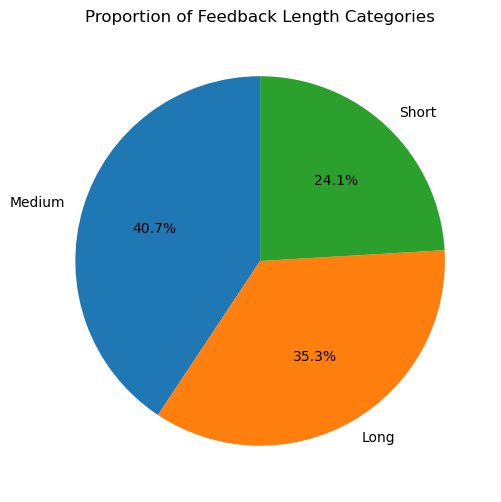

In [49]:
cleaned['length_category'] = pd.cut(
    cleaned['feedback_length'], 
    bins=[0, 50, 150, 250], 
    labels=['Short', 'Medium', 'Long']
)

# Plot the counts as a pie chart
category_counts = cleaned['length_category'].value_counts()

plt.figure(figsize=(6, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Feedback Length Categories')
plt.ylabel('')
plt.show()

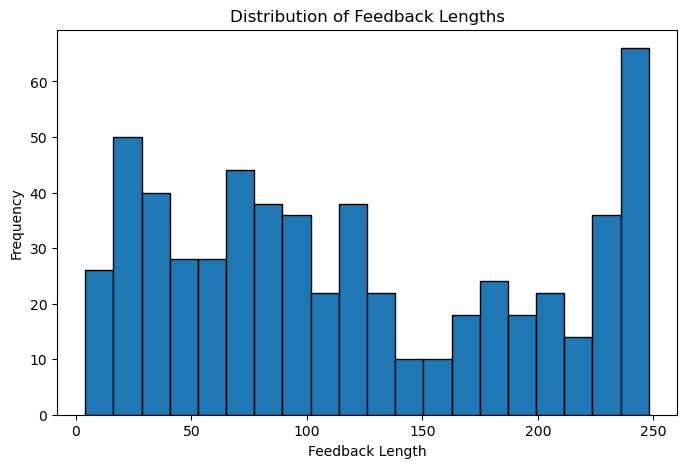

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(cleaned['feedback_length'], bins=20, edgecolor='black')
plt.title('Distribution of Feedback Lengths')
plt.xlabel('Feedback Length')
plt.ylabel('Frequency')
plt.show()

                 feedback_length  subjectivity  sentiment
feedback_length         1.000000      0.078073  -0.094021
subjectivity            0.078073      1.000000   0.379061
sentiment              -0.094021      0.379061   1.000000


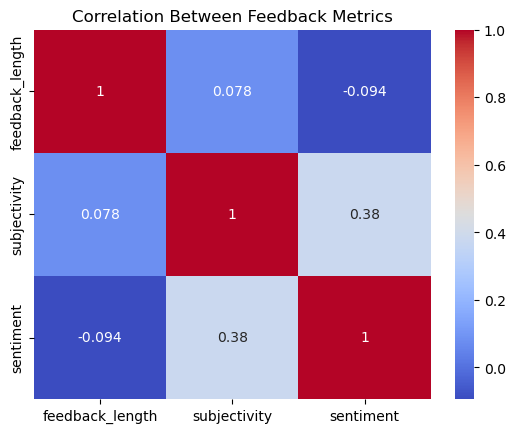

In [51]:
#Is there a correlation between feedback length and sentiment or subjectivity?
# Calculate correlation matrix
correlation = cleaned[['feedback_length', 'subjectivity', 'sentiment']].corr()
print(correlation)

import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Feedback Metrics')
plt.show()

feedback_length vs. subjectivity (0.078) - weekly positive, no meaningful correlation
feedback_length vs. sentiment (-0.094) - weakly negative - longer feedback tends to have a very slight tendency to be less positive in sentiment
subjectivity vs. sentiment (0.379) - moderately positive - the more subjective the feedback, the more positive

Visualise sentiment polarity scores on a histogram

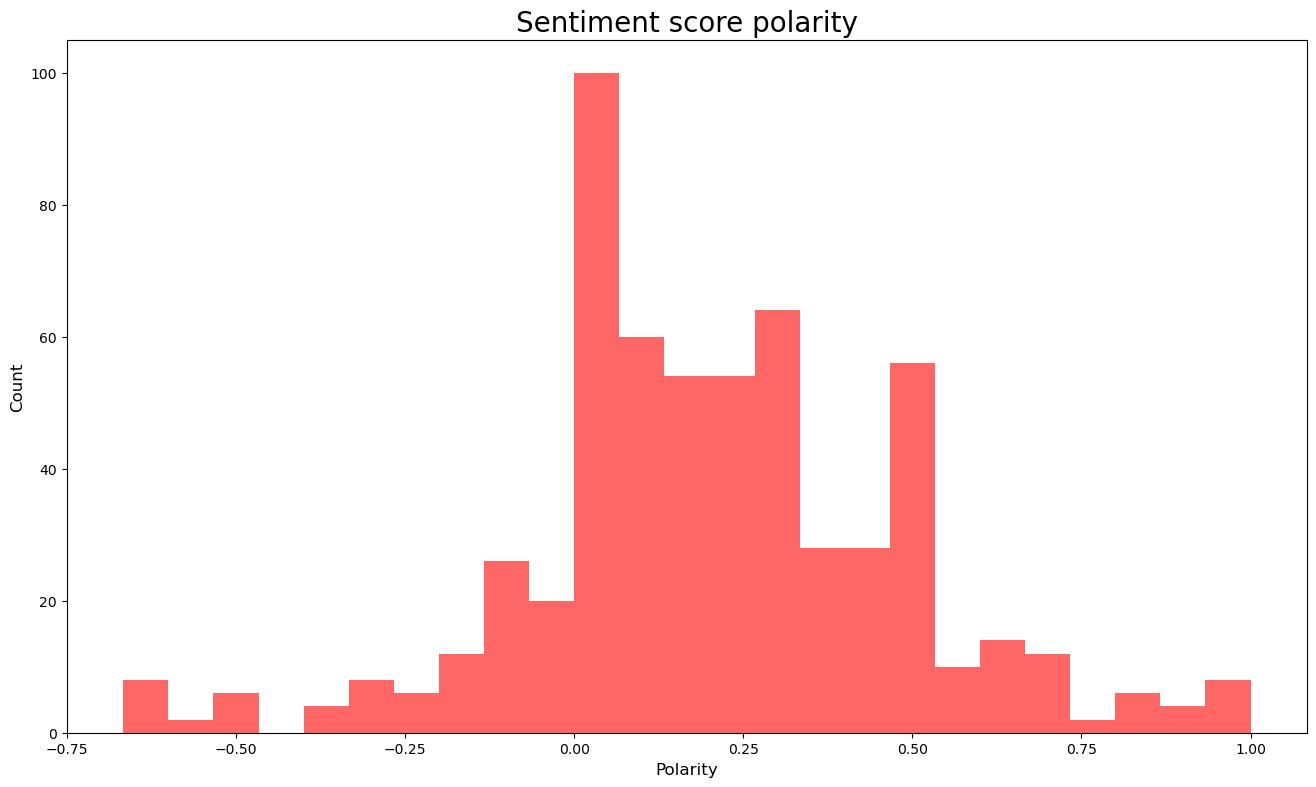

In [28]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(cleaned['polarity'], num_bins, facecolor='red', alpha=0.6)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score polarity', fontsize=20)

plt.show()

In [29]:
# Extract positive comments:

# Create a DataFrame.
positive_sentiment = cleaned.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['customer_feedback']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['customer_feedback'], **{'width': '1200px'})

,customer_feedback
40,excellent products but overly priced
45,excellent products but overly priced
243,in my experience it is always an excellent shopping experience with sweaty betty
273,very happy with shopping experience
298,in my experience it is always an excellent shopping experience with sweaty betty
328,very happy with shopping experience
360,i am very happy with the products and service
488,i am very happy with the products and service
354,happy with excellent service
482,happy with excellent service


In [30]:
# Extract negative comments:

# Create a DataFrame.
negative_sentiment = cleaned.nsmallest(10, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['customer_feedback']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['customer_feedback'], **{'width': '1200px'})

,customer_feedback
139,a tutorial on how to do up sports bra by yourself impossible
181,a tutorial on how to do up sports bra by yourself impossible
226,can be very expensive
261,price some products very expensive
281,can be very expensive
316,price some products very expensive
437,really beautifully mad leggings that i know will wash and wear well for years soooo comfy to wear
565,really beautifully mad leggings that i know will wash and wear well for years soooo comfy to wear
11,i purchased the gaia jumpsuit recentlyi couldnt return it as tag came offi put up a reviewwhich was identical problem to others who purchased itweird bad sizing nobody reached outjust a copy paste response the same as everyone else got awful
16,i purchased the gaia jumpsuit recentlyi couldnt return it as tag came offi put up a reviewwhich was identical problem to others who purchased itweird bad sizing nobody reached outjust a copy paste response the same as everyone else got awful


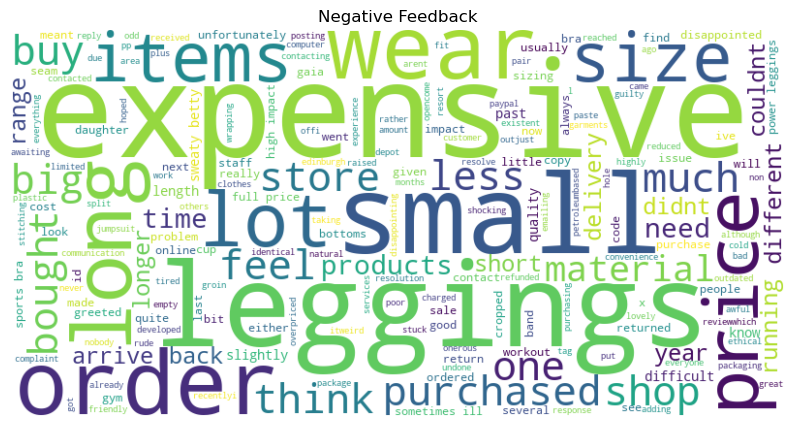

In [31]:
# Filter negative feedback based on sentiment polarity
negative_feedback = cleaned[
    cleaned['customer_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity < 0)
]

# Combine all negative feedback into a single string
negative_text = " ".join(feedback for feedback in negative_feedback['customer_feedback'])

# Generate the word cloud for negative feedback
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Feedback')
plt.show()

In [32]:
print(negative_feedback)

                                     customer_feedback  \
2    i received an empty package  next order didnt ...   
6    i received an empty package  next order didnt ...   
11   i purchased the gaia jumpsuit recentlyi couldn...   
16   i purchased the gaia jumpsuit recentlyi couldn...   
18   bought a pair of leggings less than 2 months a...   
..                                                 ...   
555  not bought lately i crisis of confidence and p...   
559     orders very slow to arrive to northern ireland   
565  really beautifully mad leggings that i know wi...   
570  some items are too long in length for shorter ...   
583  when i bought my latest gym leggings i was a b...   

                                                tokens  polarity  \
2    [i, received, an, empty, package, next, order,... -0.350000   
6    [i, received, an, empty, package, next, order,... -0.350000   
11   [i, purchased, the, gaia, jumpsuit, recentlyi,... -0.566667   
16   [i, purchased, the, gaia, 

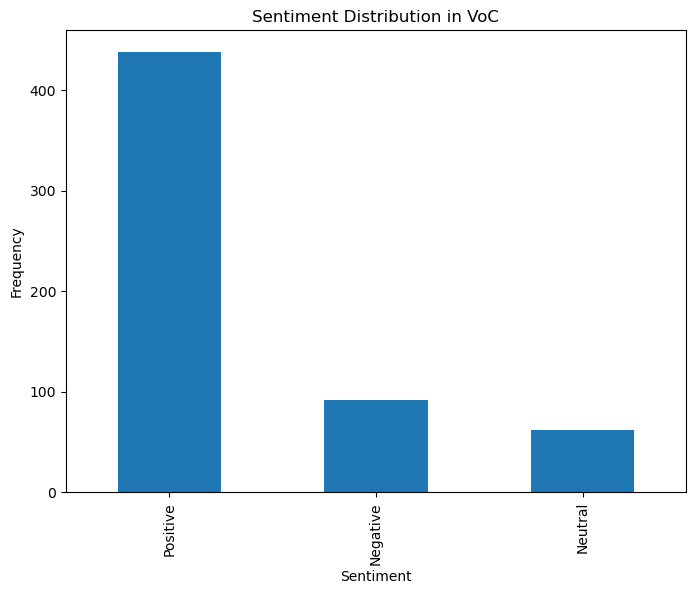

In [33]:
from textblob import TextBlob

# Calculate sentiment polarity for each feedback
cleaned['sentiment'] = cleaned['customer_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
cleaned['sentiment_category'] = cleaned['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

sentiment_counts = cleaned['sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Distribution in VoC')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Discovering is I can cluster feedback by themes.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from IPython.display import display

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
X = vectorizer.fit_transform(cleaned['customer_feedback'])

# K-Means clustering to group feedback into themes
kmeans = KMeans(n_clusters=5, random_state=42)
cleaned['cluster'] = kmeans.fit_predict(X)

# Feedback into clusters:
display(cleaned)

,customer_feedback,tokens,polarity,subjectivity,feedback_length,sentiment,sentiment_category,cluster
0,i had a hole in my leggings and contacted cust...,"[i, had, a, hole, in, my, leggings, and, conta...",0.00,0.0000,85,0.00,Neutral,4
1,i placed an order over a week ago the money pa...,"[i, placed, an, order, over, a, week, ago, the...",0.05,0.8000,247,0.05,Positive,4
2,i received an empty package next order didnt ...,"[i, received, an, empty, package, next, order,...",-0.35,0.4250,244,-0.35,Negative,3
3,unfortunately the quality is not as good as it...,"[unfortunately, the, quality, is, not, as, goo...",0.20,0.5000,217,0.20,Positive,2
4,i had a hole in my leggings and contacted cust...,"[i, had, a, hole, in, my, leggings, and, conta...",0.00,0.0000,85,0.00,Neutral,4
...,...,...,...,...,...,...,...,...
587,your staff customer service and products are a...,"[your, staff, customer, service, and, products...",0.25,0.4875,105,0.25,Positive,4
588,cost,[cost],0.00,0.0000,4,0.00,Neutral,0
589,price,[price],0.00,0.0000,5,0.00,Neutral,1
590,cost,[cost],0.00,0.0000,4,0.00,Neutral,0


In [35]:
# Print sample feedback for each cluster
for cluster in cleaned['cluster'].unique():
    print(f"\nTheme {cluster}:")
    print(cleaned[cleaned['cluster'] == cluster]['customer_feedback'].sample(5, random_state=42).to_list())


Theme 4:
['always excellent and top quality products and service from start to finish i tend to buy during the sales and offers', 'expensive for quality which has fallen over the years limited style not really catering for petites like you did i would like to see responsible sourcing as standard more cycling clothing i still love sb but ive switched to ms', 'i shop with you whenever i need something for my training workouts or casual wear i am conscious not to buy stuff too often otherwise i finish up with too much which is not good for the planet or my soul', 'great quality products', 'devastated gary yoga pants replaced by the less than perfect gaia  just not the same  please bring gary back my local store victoria has very limited stocksize selection fewer leggings more long sleeved tops wout thumb holes please']

Theme 3:
['i think a points or loyalty card scheme could be great i love athletic wear and would be more inclined to buy majority of my wear from sweaty betty if there wa

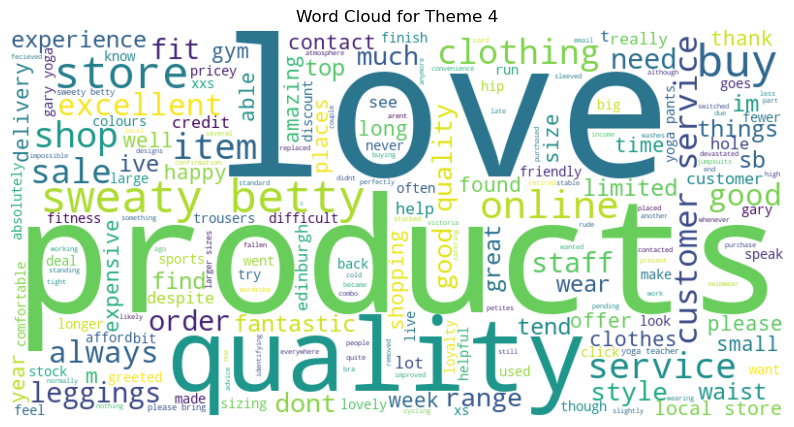

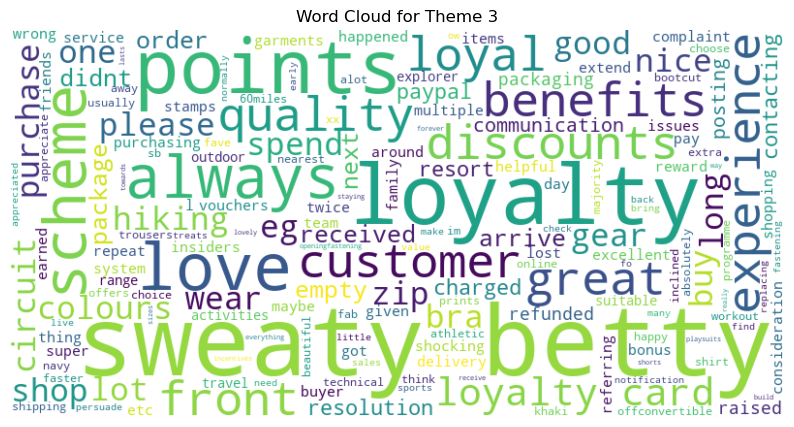

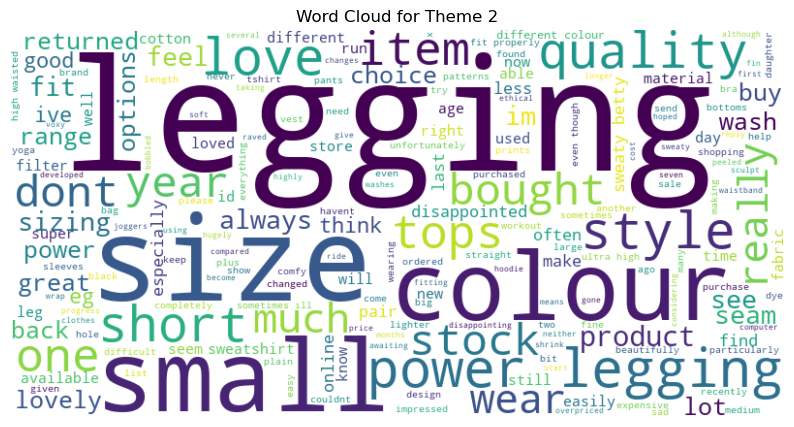

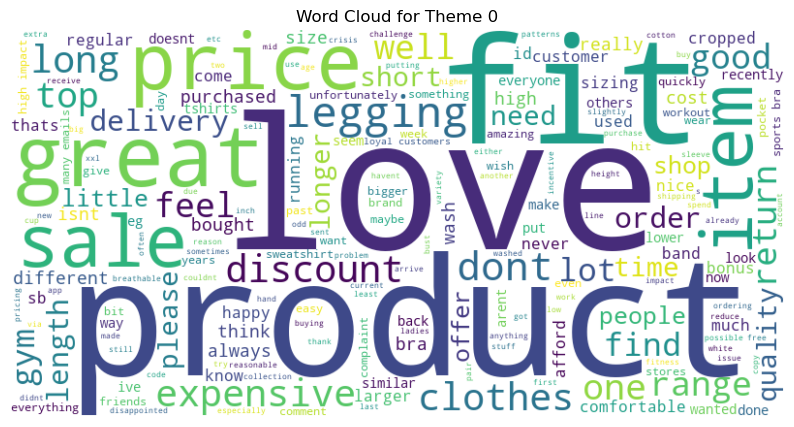

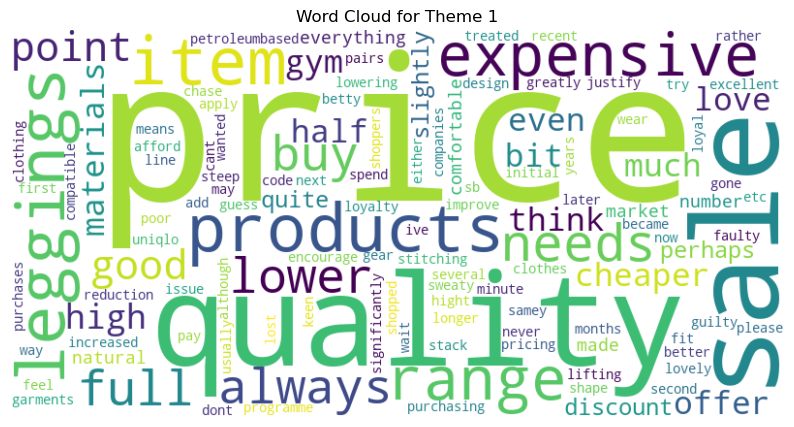

In [36]:
# Loop through each cluster and generate a word cloud
for cluster in cleaned['cluster'].unique():
    cluster_feedback = " ".join(cleaned[cleaned['cluster'] == cluster]['customer_feedback'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_feedback)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Theme {cluster}')
    plt.show()

In [37]:
negative_feedback_text = negative_feedback['customer_feedback'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(negative_feedback_text)


n_clusters = min(4, len(negative_feedback))  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


negative_feedback['cluster'] = kmeans.fit_predict(X_tfidf)


grouped_clusters = negative_feedback.groupby('cluster')['customer_feedback'].apply(list)


for cluster, feedbacks in grouped_clusters.items():
    print(f"\nCluster {cluster}:")
    print(feedbacks[:5])


Cluster 0:
['i received an empty package  next order didnt arrive  both i was charged for  had to resort to contacting paypal for resolution as no communication from sweaty betty  posting and packaging was not refunded until i raised a complaint  shocking l', 'i received an empty package  next order didnt arrive  both i was charged for  had to resort to contacting paypal for resolution as no communication from sweaty betty  posting and packaging was not refunded until i raised a complaint  shocking l', 'i have had problems with delivery of 3 different orders from you emailing you to resolve each issue is onerous  outdated i had one order stuck at the depot one order i was never advised that it was ready for collection one sent back to sender', 'my parcel has been delivery at a different adress but 2 doors down  but i couldnt collect it because didnt have a qr code ', 'order took too long to arrive compared to other companies']

Cluster 1:
['i purchased the gaia jumpsuit recentlyi coul

In [38]:
print(sentiment_counts)

Positive    438
Negative     92
Neutral      62
Name: sentiment_category, dtype: int64


In [39]:
# Tokenize the negative feedback text and remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in word_tokenize(negative_text.lower()) if word.isalpha() and word not in stop_words]

# Count the most common keywords
keyword_counts = Counter(tokens).most_common(20)

# Convert the result to a DataFrame for clarity
negative_keywords_df = pd.DataFrame(keyword_counts, columns=['Keyword', 'Count'])

# Display the DataFrame
print(negative_keywords_df)

      Keyword  Count
0   expensive     24
1    leggings     22
2       small     16
3       price     14
4        wear     12
5        long     12
6       order     10
7       items     10
8        size     10
9   purchased      8
10     bought      8
11       less      8
12      store      8
13        lot      8
14      think      8
15       much      8
16       like      8
17        one      8
18        big      8
19        buy      8


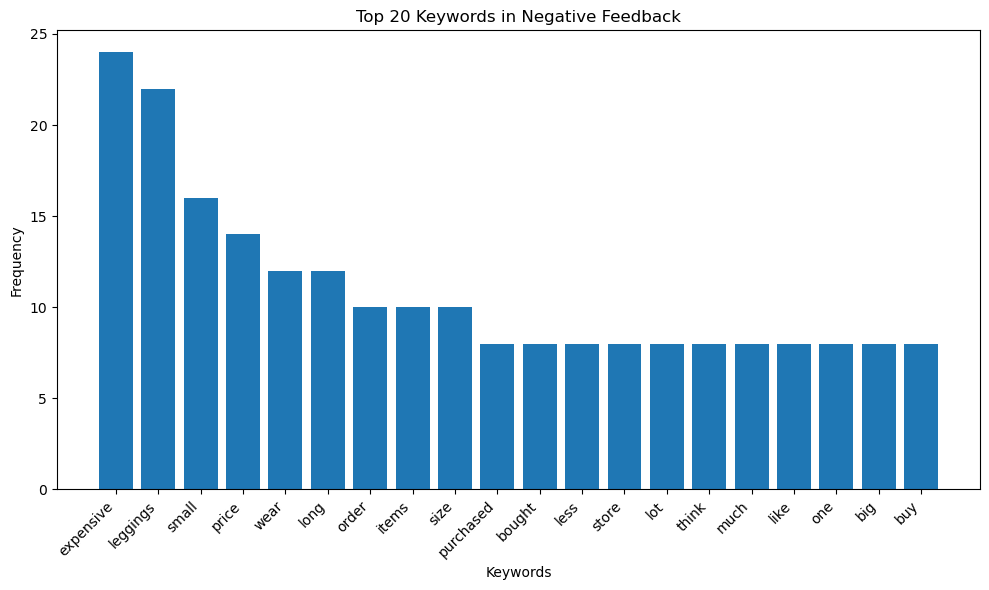

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(negative_keywords_df['Keyword'], negative_keywords_df['Count'])
plt.title('Top 20 Keywords in Negative Feedback')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()